# Regression Metrics Demonstration

This notebook demonstrates regression metrics step by step:
- Manual implementation of metrics  
- Comparison with scikit-learn one-liners  
- Visualization of errors (residuals & histograms)  
- Summary table of when to use each metric

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, 
    r2_score, mean_absolute_percentage_error
)
import matplotlib.cm as cm

## Step 1: Generate synthetic dataset

In [2]:
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y_true = 3*X.squeeze() + 5
y = y_true + np.random.normal(0, 3, 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step 2: Train regression model

In [3]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Step 3: Visualize predictions vs ground truth

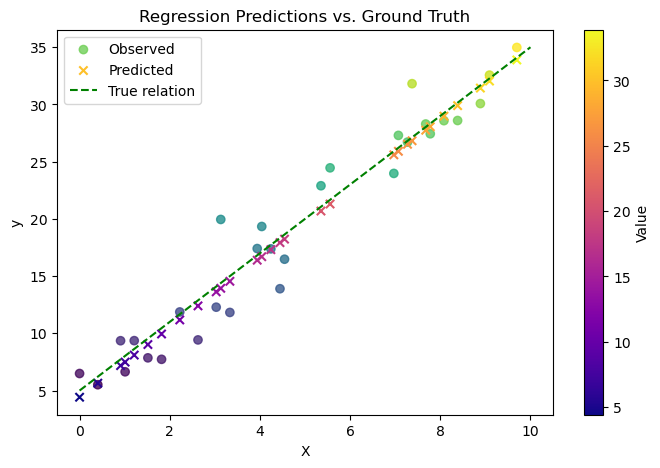

In [4]:
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, c=y_test, cmap="viridis", label="Observed", alpha=0.8)
plt.scatter(X_test, y_pred, c=y_pred, cmap="plasma", marker="x", label="Predicted")
plt.plot(X, y_true, 'g--', label="True relation")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regression Predictions vs. Ground Truth")
plt.legend()
plt.colorbar(label="Value")
plt.show()

## Step 4: Define metrics manually

In [5]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res/ss_tot

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

## Step 5: Evaluate metrics (manual implementation)

In [6]:
mse_val = mse(y_test, y_pred)
rmse_val = rmse(y_test, y_pred)
mae_val = mae(y_test, y_pred)
r2_val = r2(y_test, y_pred)
mape_val = mape(y_test, y_pred)

metrics_manual = pd.DataFrame({
    "Metric": ["MSE", "RMSE", "MAE", "R²", "MAPE"],
    "Value (manual)": [mse_val, rmse_val, mae_val, r2_val, mape_val]
})
metrics_manual

,Metric,Value (manual)
0,MSE,4.993768
1,RMSE,2.234674
2,MAE,1.750366
3,R²,0.939387
4,MAPE,0.119496


## Step 6: Evaluate metrics (scikit-learn one-liners)

In [7]:
mse_skl = mean_squared_error(y_test, y_pred)
rmse_skl = np.sqrt(mse_skl)
mae_skl = mean_absolute_error(y_test, y_pred)
r2_skl = r2_score(y_test, y_pred)
mape_skl = mean_absolute_percentage_error(y_test, y_pred)

metrics_sklearn = pd.DataFrame({
    "Metric": ["MSE", "RMSE", "MAE", "R²", "MAPE"],
    "Value (sklearn)": [mse_skl, rmse_skl, mae_skl, r2_skl, mape_skl]
})
metrics_sklearn

,Metric,Value (sklearn)
0,MSE,4.993768
1,RMSE,2.234674
2,MAE,1.750366
3,R²,0.939387
4,MAPE,0.119496


## Step 7: Visualize residuals and error distribution

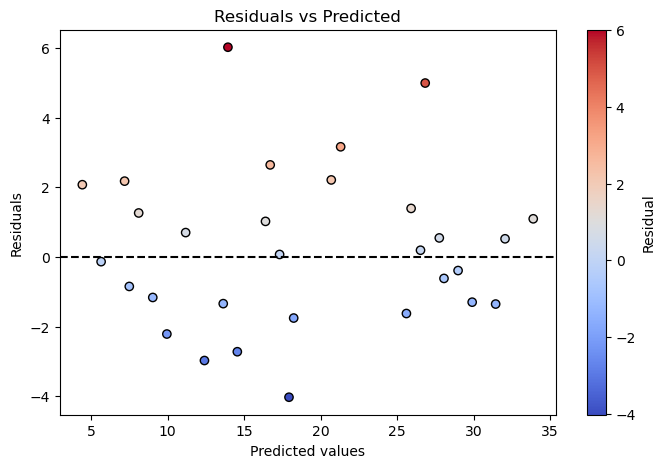

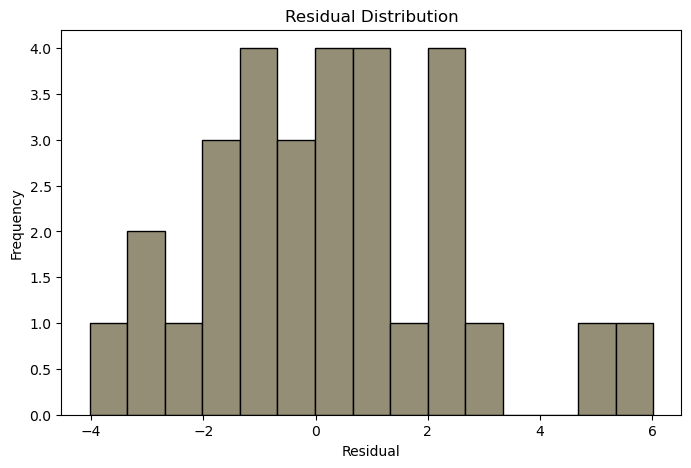

In [8]:
residuals = y_test - y_pred

# Residual scatter
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, c=residuals, cmap="coolwarm", edgecolors="k")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.colorbar(label="Residual")
plt.show()

# Residual histogram
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=15, color=cm.cividis(0.6), edgecolor="black")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

| **Metric** | **Formula** | **When to Use** | **Notes** |
|------------|-------------|-----------------|-----------|
| **MSE**    | $\frac{1}{n} \sum (y_i - \hat{y}_i)^2$ | Penalize large errors | Sensitive to outliers |
| **RMSE**   | $\sqrt{MSE}$ | Same as MSE but in original units | Easier to interpret |
| **MAE**    | $\frac{1}{n} \sum \lvert y_i - \hat{y}_i \rvert$ | Robust to outliers | Linear penalty |
| **R²**     | $1 - \frac{RSS}{TSS}$ | Variance explained | Can be negative |
| **MAPE**   | $\frac{1}{n} \sum \left\lvert \frac{y_i - \hat{y}_i}{y_i}\right\rvert$ | Percentage error (forecasting) | Undefined if $y_i=0$ |
